# Data Preprocessing

In [1]:
#import the libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

In [2]:
#read the datasets
df1=pd.read_csv(r'E:\Desktop\Datasets\UnSupervised Learning\Customer Segmentation\train.csv')
df2=pd.read_csv(r'E:\Desktop\Datasets\UnSupervised Learning\Customer Segmentation\test.csv')

In [3]:
df1.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
df2.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [5]:
df1.shape,df2.shape

((8068, 11), (2627, 10))

In [6]:
df1.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [7]:
df1=df1.drop(['Work_Experience','Segmentation'],axis=1)

In [8]:
df1.isnull().sum()

ID                  0
Gender              0
Ever_Married      140
Age                 0
Graduated          78
Profession        124
Spending_Score      0
Family_Size       335
Var_1              76
dtype: int64

In [9]:
df1 = df1.dropna()
df1.isnull().sum()

ID                0
Gender            0
Ever_Married      0
Age               0
Graduated         0
Profession        0
Spending_Score    0
Family_Size       0
Var_1             0
dtype: int64

In [10]:
df1.shape

(7376, 9)

In [11]:
df2.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [12]:
df2=df2.drop('Work_Experience',axis=1)

In [13]:
df2 = df2.dropna()
df2.isnull().sum()

ID                0
Gender            0
Ever_Married      0
Age               0
Graduated         0
Profession        0
Spending_Score    0
Family_Size       0
Var_1             0
dtype: int64

In [14]:
df2.shape

(2384, 9)

In [15]:
#combine 2 dataframes for using in this task....
df3=df1.append(df2)
df3.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,Average,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,Low,1.0,Cat_6
3,461735,Male,Yes,67,Yes,Lawyer,High,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,High,6.0,Cat_6


In [16]:
#final shape
df3.shape

(9760, 9)

In [17]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,9760.0,463466.609734,2589.332890,458982.0,461273.75,463445.5,465686.25,467974.0
Age,9760.0,43.555840,16.691408,18.0,31.00,41.0,53.00,89.0
Family_Size,9760.0,2.843033,1.535104,1.0,2.00,2.0,4.00,9.0


In [18]:
df3.dtypes

ID                  int64
Gender             object
Ever_Married       object
Age                 int64
Graduated          object
Profession         object
Spending_Score     object
Family_Size       float64
Var_1              object
dtype: object

In [19]:
df3['Gender'].value_counts()

Male      5379
Female    4381
Name: Gender, dtype: int64

In [20]:
df3['Graduated'].value_counts()

Yes    6132
No     3628
Name: Graduated, dtype: int64

In [21]:
df3['Ever_Married'].value_counts()

Yes    5787
No     3973
Name: Ever_Married, dtype: int64

In [22]:
df3['Profession'].value_counts()

Artist           3140
Healthcare       1581
Entertainment    1157
Doctor            872
Engineer          866
Lawyer            775
Executive         728
Marketing         365
Homemaker         276
Name: Profession, dtype: int64

In [23]:
df3['Spending_Score'].value_counts()

Low        5852
Average    2419
High       1489
Name: Spending_Score, dtype: int64

In [24]:
df3['Var_1'].value_counts()

Cat_6    6497
Cat_4    1313
Cat_3     932
Cat_2     525
Cat_7     246
Cat_1     149
Cat_5      98
Name: Var_1, dtype: int64

# Encoding data 

In [25]:
cols=['Gender','Var_1','Spending_Score','Profession','Ever_Married','Graduated','Gender']

In [26]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in cols:
    df3[i]=df3[[i]].apply(LE.fit_transform)

In [27]:
#after encoding...
df3.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size,Var_1
0,462809,1,0,22,0,5,2,4.0,3
1,462643,0,1,38,1,2,0,3.0,3
2,466315,0,1,67,1,2,2,1.0,5
3,461735,1,1,67,1,7,1,2.0,5
4,462669,0,1,40,1,3,1,6.0,5


In [28]:
#Scaling the features
scaler = StandardScaler()
scaler.fit(df3)
scaled_df = pd.DataFrame(scaler.transform(df3),columns= df3.columns )

In [29]:
#after scaling down
scaled_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size,Var_1
0,-0.253982,0.902476,-1.206889,-1.291499,-1.300072,0.882823,0.762016,0.753712,-0.829508
1,-0.318094,-1.108062,0.828576,-0.332873,0.769188,-0.297122,-1.588948,0.102257,-0.829508
2,1.100104,-1.108062,0.828576,1.404637,0.769188,-0.297122,0.762016,-1.200653,0.590718
3,-0.668782,0.902476,0.828576,1.404637,0.769188,1.669453,-0.413466,-0.549198,0.590718
4,-0.308053,-1.108062,0.828576,-0.213045,0.769188,0.096193,-0.413466,2.056622,0.590718


In [30]:
#Dimension Reduction (to 3 features)
#This is also a feature selection technique for unsupervised learning(found when refer the internet)
#Reference: https://datascience.stackexchange.com/questions/29572/is-it-possible-to-do-feature-selection-for-unsupervised-machine-learning-problem

pca = PCA(n_components=3)
pca.fit(scaled_df)
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=(["col1","col2", "col3"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,9760.0,6.010675e-17,1.500737,-3.106787,-1.271116,-0.235807,1.196453,3.507895
col2,9760.0,1.001476e-16,1.164830,-2.735953,-0.810441,0.051897,0.776993,4.102895
col3,9760.0,-2.204521e-17,1.085003,-2.971413,-0.783794,-0.138526,0.598050,3.604162


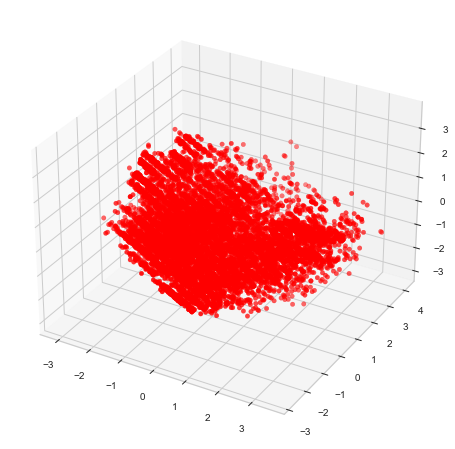

In [31]:
#plotting the generated 3 features
x =PCA_df["col1"]
y =PCA_df["col2"]
z =PCA_df["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="red", marker="o" )
plt.show()

# K Means Clustering

## Elbow method

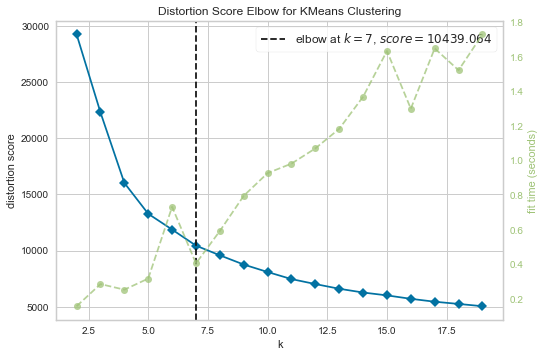

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
#To find the optimum K value
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k=(2, 20))
visu.fit(PCA_df)
visu.show()

In [33]:
#with 7 clusters
model1 = KMeans(n_clusters=7)

In [34]:
k_fit=model1.fit(PCA_df)

In [35]:
model1.cluster_centers_

array([[-0.86101461, -0.75696034, -0.04793909],
       [ 2.21912193,  0.52217648,  0.08675007],
       [-0.32472981,  1.582381  ,  0.05381473],
       [ 0.8115913 , -1.42439753, -0.41453556],
       [-1.09243517, -0.07505615,  2.03779585],
       [-1.6635002 ,  0.47773416, -0.91531808]])

In [36]:
#Predicting the Clusters
predictions = k_fit.labels_
PCA_df['Clusters'] = predictions
PCA_df.head()

,col1,col2,col3,Clusters
0,2.558948,0.985398,0.352215,1
1,-1.125335,0.567464,-1.316109,5
2,-1.447867,-1.639169,0.514711,0
3,-1.476484,0.015891,2.038293,4
4,-0.414821,0.845967,-0.767042,2


## Interppretation on clusters found(K Means Clustering)

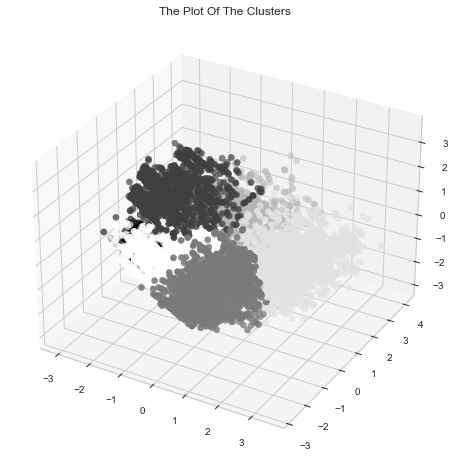

In [37]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o')
ax.set_title("The Plot Of The Clusters")
plt.show()

# Hierarchical clustering

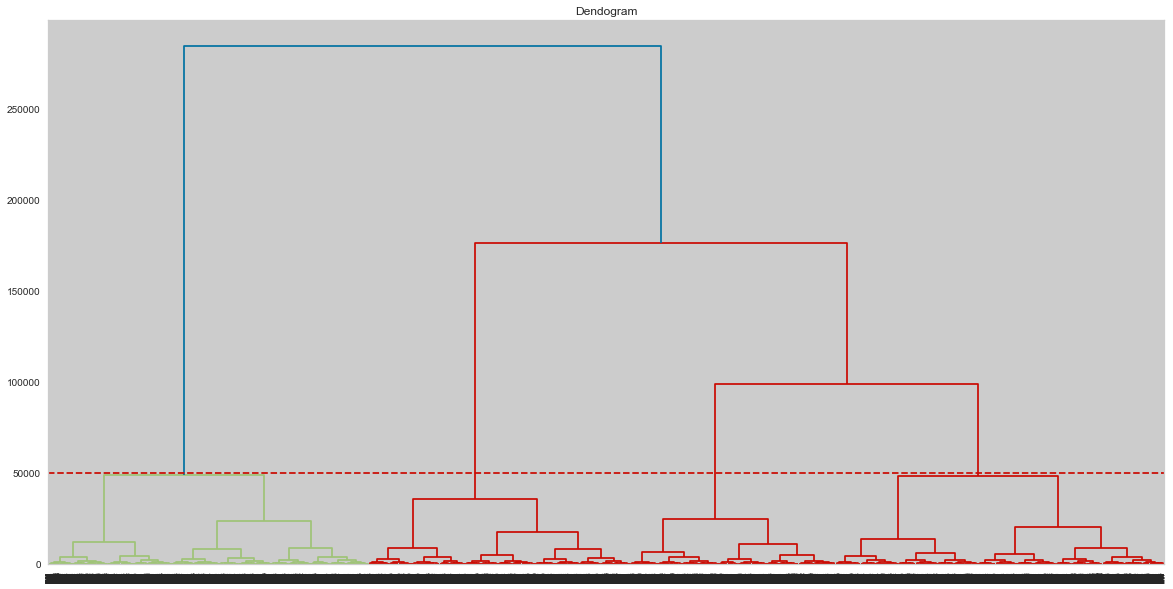

In [38]:
plt.figure(figsize=(20,10))
dendrogram=sch.dendrogram(sch.linkage(df3,method='ward'))
plt.title('Dendogram')
plt.axhline(y=50000,color='r',linestyle='--')
plt.show()

In [39]:
cluster=AgglomerativeClustering(n_clusters=7,affinity='euclidean',linkage='ward')
predictions2=cluster.fit_predict(PCA_df)
PCA_df["Clusters_2"] = predictions2

## Interppretation on clusters found(Hierarchical clustering)

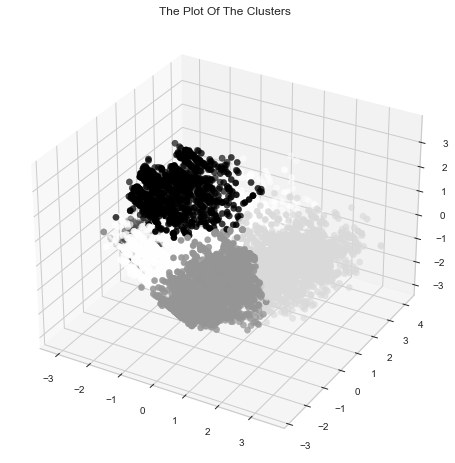

In [41]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters_2"], marker='o')
ax.set_title("The Plot Of The Clusters")
plt.show()